In [1]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data

df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

Date  bond_yield  budget_sur_def  fed_interest_rates       gdp  \
0  1990-01-01        8.99          8282.0                7.97  5872.701   
1  1990-02-01        9.22        -35207.0                8.25  5872.701   
2  1990-03-01        9.37        -53324.0                8.30  5960.028   
3  1990-04-01        9.46         41829.0                8.30  5960.028   
4  1990-05-01        9.47        -42482.0                8.11  5960.028   

   m2_money_supply  pers_consum_Expen      sp_500  unemployment  us_debt  \
0            1.848             3730.7  360.589996           5.4   3035.6   
1            1.848             3728.2  336.089996           5.3   3043.9   
2            1.859             3754.9  344.489990           5.2   3087.4   
3            1.859             3770.0  347.299988           5.4   3062.8   
4            1.859             3775.8  362.260010           5.4   3138.3   

   us_dollar_index  volatility_index  cpi_all  cpi_adjusted  
0        94.540001             17.24    127.5      4.905908  
1        93.449997             24.87    128.0      4.917559  
2        94.720001             21.90    128.6      5.191525  
3        94.320000             22.84    128.9      5.276985  
4        93.300003             18.43    129.1      5.166732

In [4]:
df.set_index('Date',inplace = True)

Instead of US debt, let's calculate US debt to gdp ratio.

In [5]:
df['debt_to_gdp'] = df['us_debt']/df['gdp']

Let's adjust SP 500 for inflation. This is done by dividing SP500 by CPI.

In [6]:
df['sp_500_adjusted'] = 100*df['sp_500']/df['cpi_all']

In [7]:
df.head()

bond_yield  budget_sur_def  fed_interest_rates       gdp  \
Date                                                                   
1990-01-01        8.99          8282.0                7.97  5872.701   
1990-02-01        9.22        -35207.0                8.25  5872.701   
1990-03-01        9.37        -53324.0                8.30  5960.028   
1990-04-01        9.46         41829.0                8.30  5960.028   
1990-05-01        9.47        -42482.0                8.11  5960.028   

            m2_money_supply  pers_consum_Expen      sp_500  unemployment  \
Date                                                                       
1990-01-01            1.848             3730.7  360.589996           5.4   
1990-02-01            1.848             3728.2  336.089996           5.3   
1990-03-01            1.859             3754.9  344.489990           5.2   
1990-04-01            1.859             3770.0  347.299988           5.4   
1990-05-01            1.859             3775.8  362.260010           5.4   

            us_debt  us_dollar_index  volatility_index  cpi_all  cpi_adjusted  \
Date                                                                            
1990-01-01   3035.6        94.540001             17.24    127.5      4.905908   
1990-02-01   3043.9        93.449997             24.87    128.0      4.917559   
1990-03-01   3087.4        94.720001             21.90    128.6      5.191525   
1990-04-01   3062.8        94.320000             22.84    128.9      5.276985   
1990-05-01   3138.3        93.300003             18.43    129.1      5.166732   

            debt_to_gdp  sp_500_adjusted  
Date                                      
1990-01-01     0.516900       282.815683  
1990-02-01     0.518313       262.570309  
1990-03-01     0.518018       267.877131  
1990-04-01     0.513890       269.433660  
1990-05-01     0.526558       280.604191

Now let's drop columns we don't need.

In [8]:
df.drop(['sp_500','us_debt'],axis ='columns',inplace=True)

In [9]:
df.head()

bond_yield  budget_sur_def  fed_interest_rates       gdp  \
Date                                                                   
1990-01-01        8.99          8282.0                7.97  5872.701   
1990-02-01        9.22        -35207.0                8.25  5872.701   
1990-03-01        9.37        -53324.0                8.30  5960.028   
1990-04-01        9.46         41829.0                8.30  5960.028   
1990-05-01        9.47        -42482.0                8.11  5960.028   

            m2_money_supply  pers_consum_Expen  unemployment  us_dollar_index  \
Date                                                                            
1990-01-01            1.848             3730.7           5.4        94.540001   
1990-02-01            1.848             3728.2           5.3        93.449997   
1990-03-01            1.859             3754.9           5.2        94.720001   
1990-04-01            1.859             3770.0           5.4        94.320000   
1990-05-01            1.859             3775.8           5.4        93.300003   

            volatility_index  cpi_all  cpi_adjusted  debt_to_gdp  \
Date                                                               
1990-01-01             17.24    127.5      4.905908     0.516900   
1990-02-01             24.87    128.0      4.917559     0.518313   
1990-03-01             21.90    128.6      5.191525     0.518018   
1990-04-01             22.84    128.9      5.276985     0.513890   
1990-05-01             18.43    129.1      5.166732     0.526558   

            sp_500_adjusted  
Date                         
1990-01-01       282.815683  
1990-02-01       262.570309  
1990-03-01       267.877131  
1990-04-01       269.433660  
1990-05-01       280.604191

Let's plot the histograms of each feature.

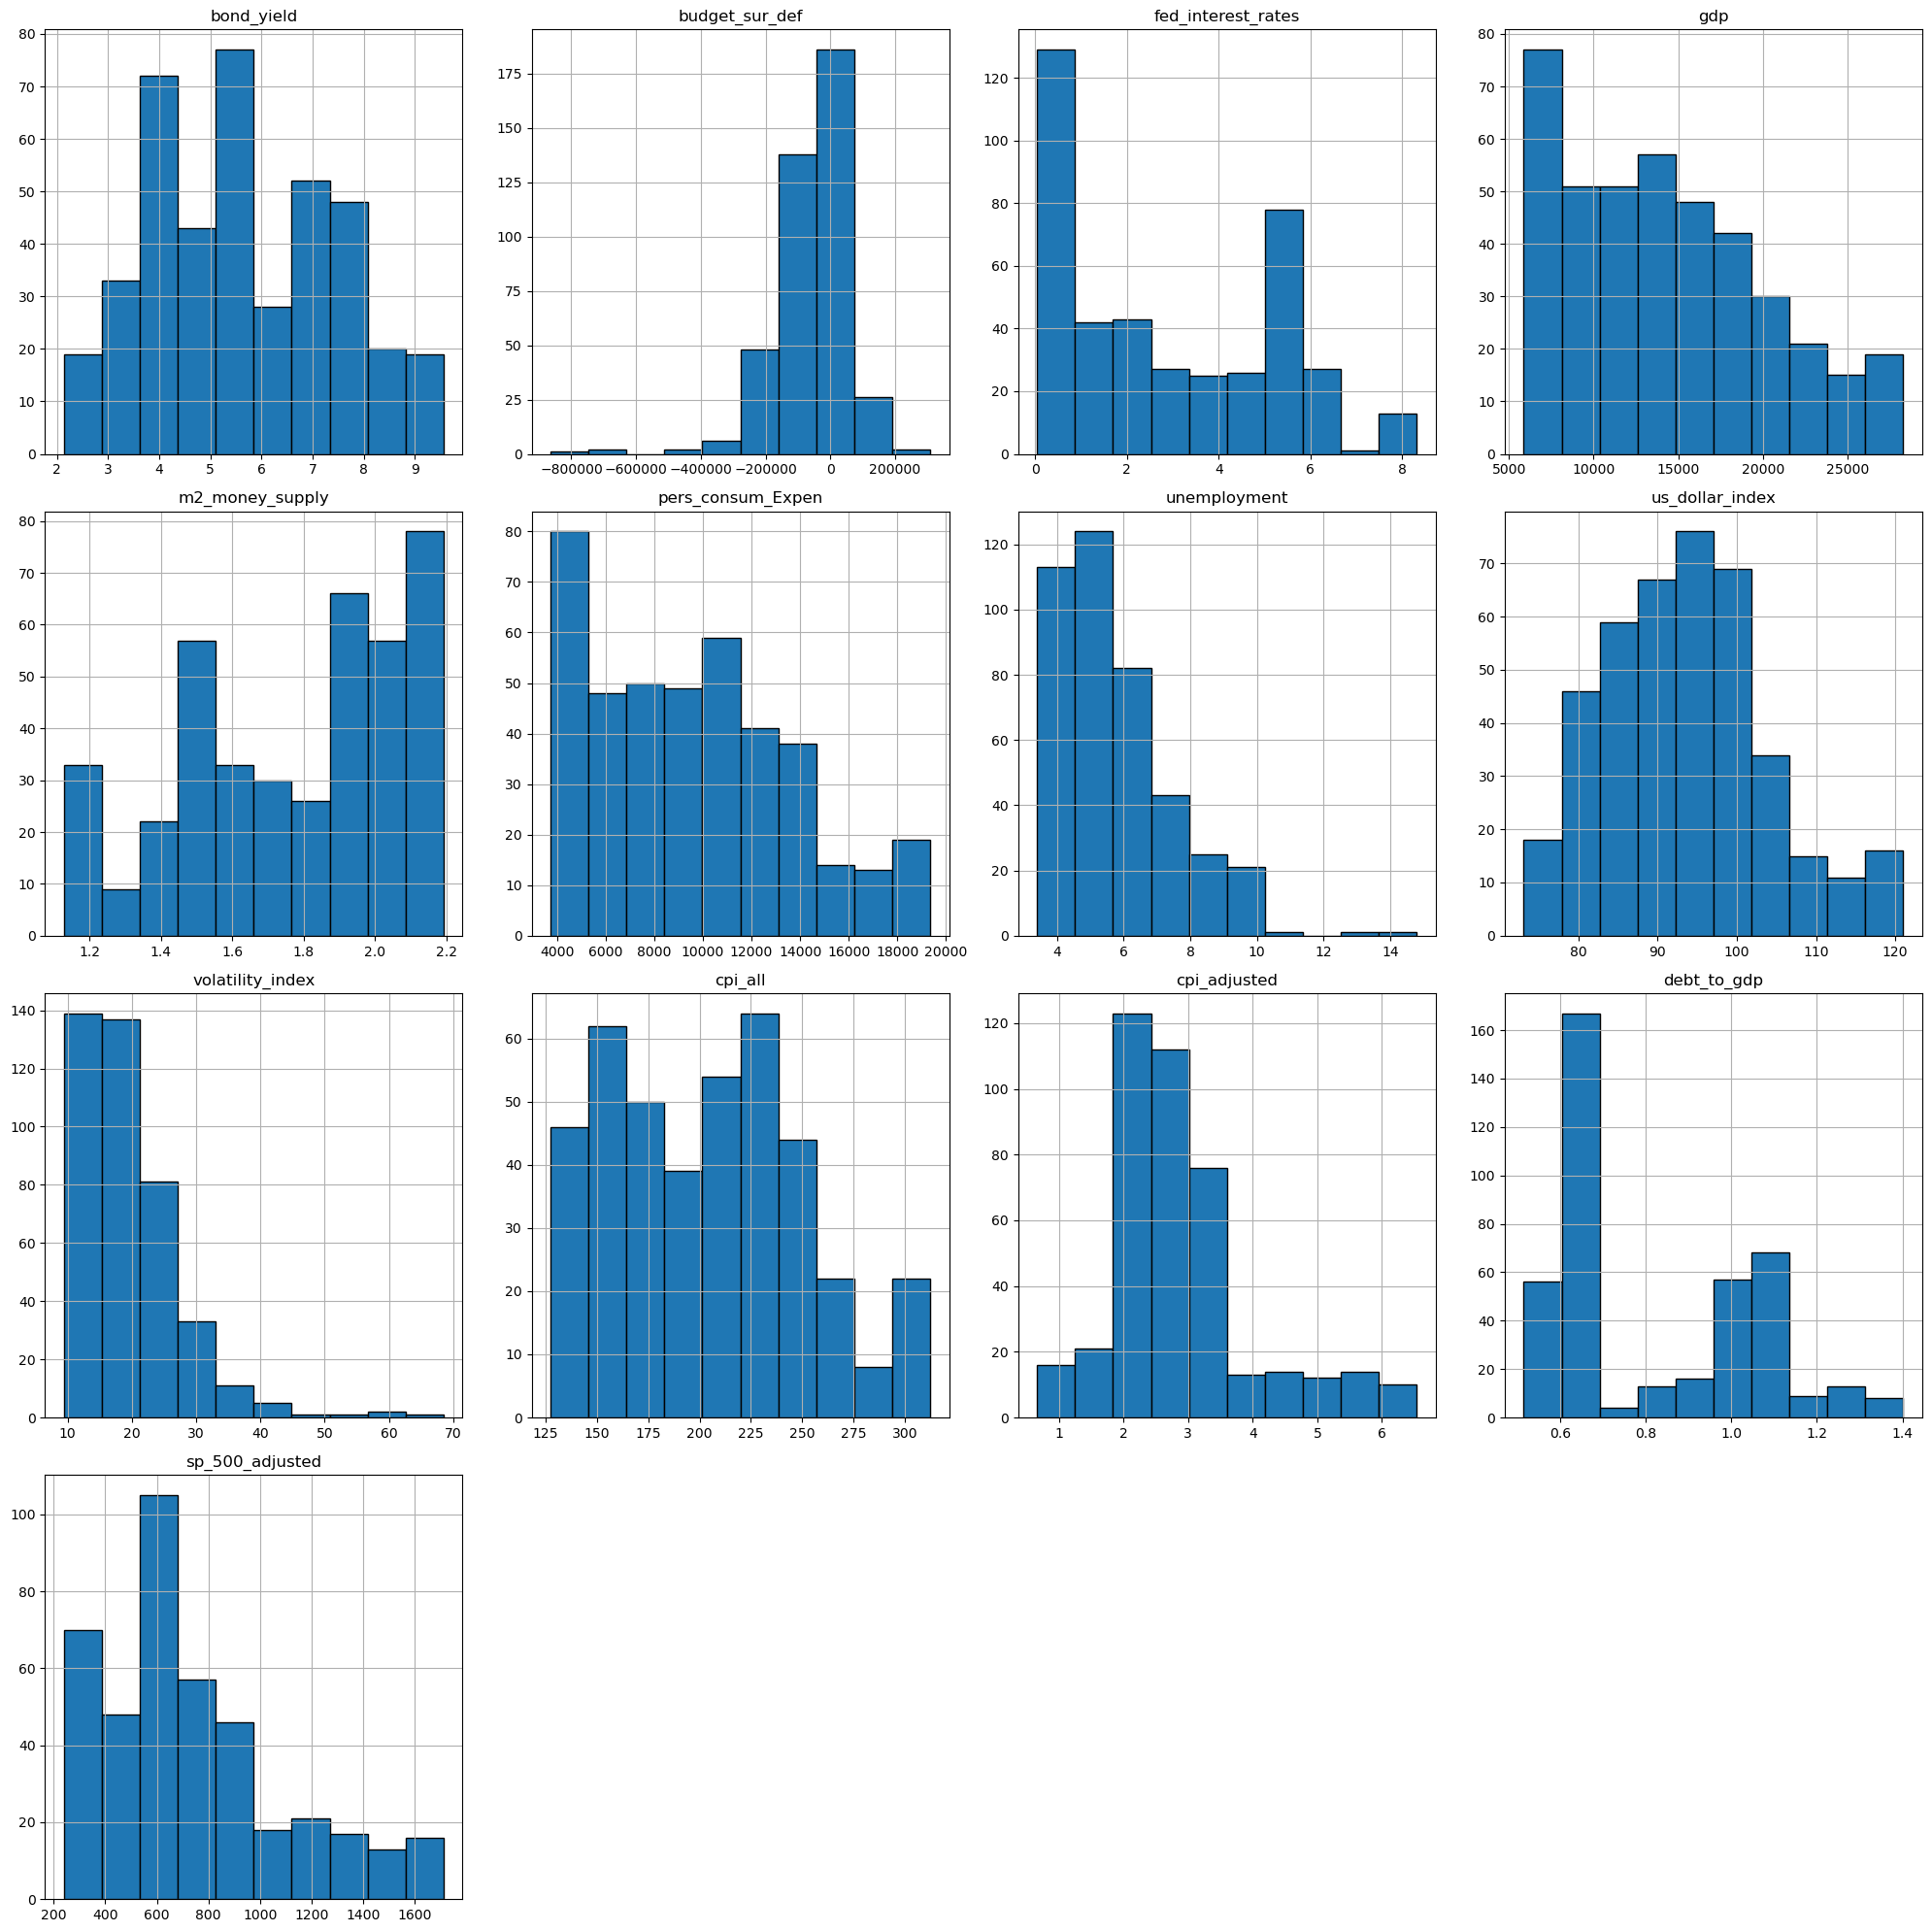

In [10]:
df.hist(figsize=(20,20),ec="k")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

#### Paiplots to visualize correlations

C:\Users\Nadun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nadun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nadun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nadun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

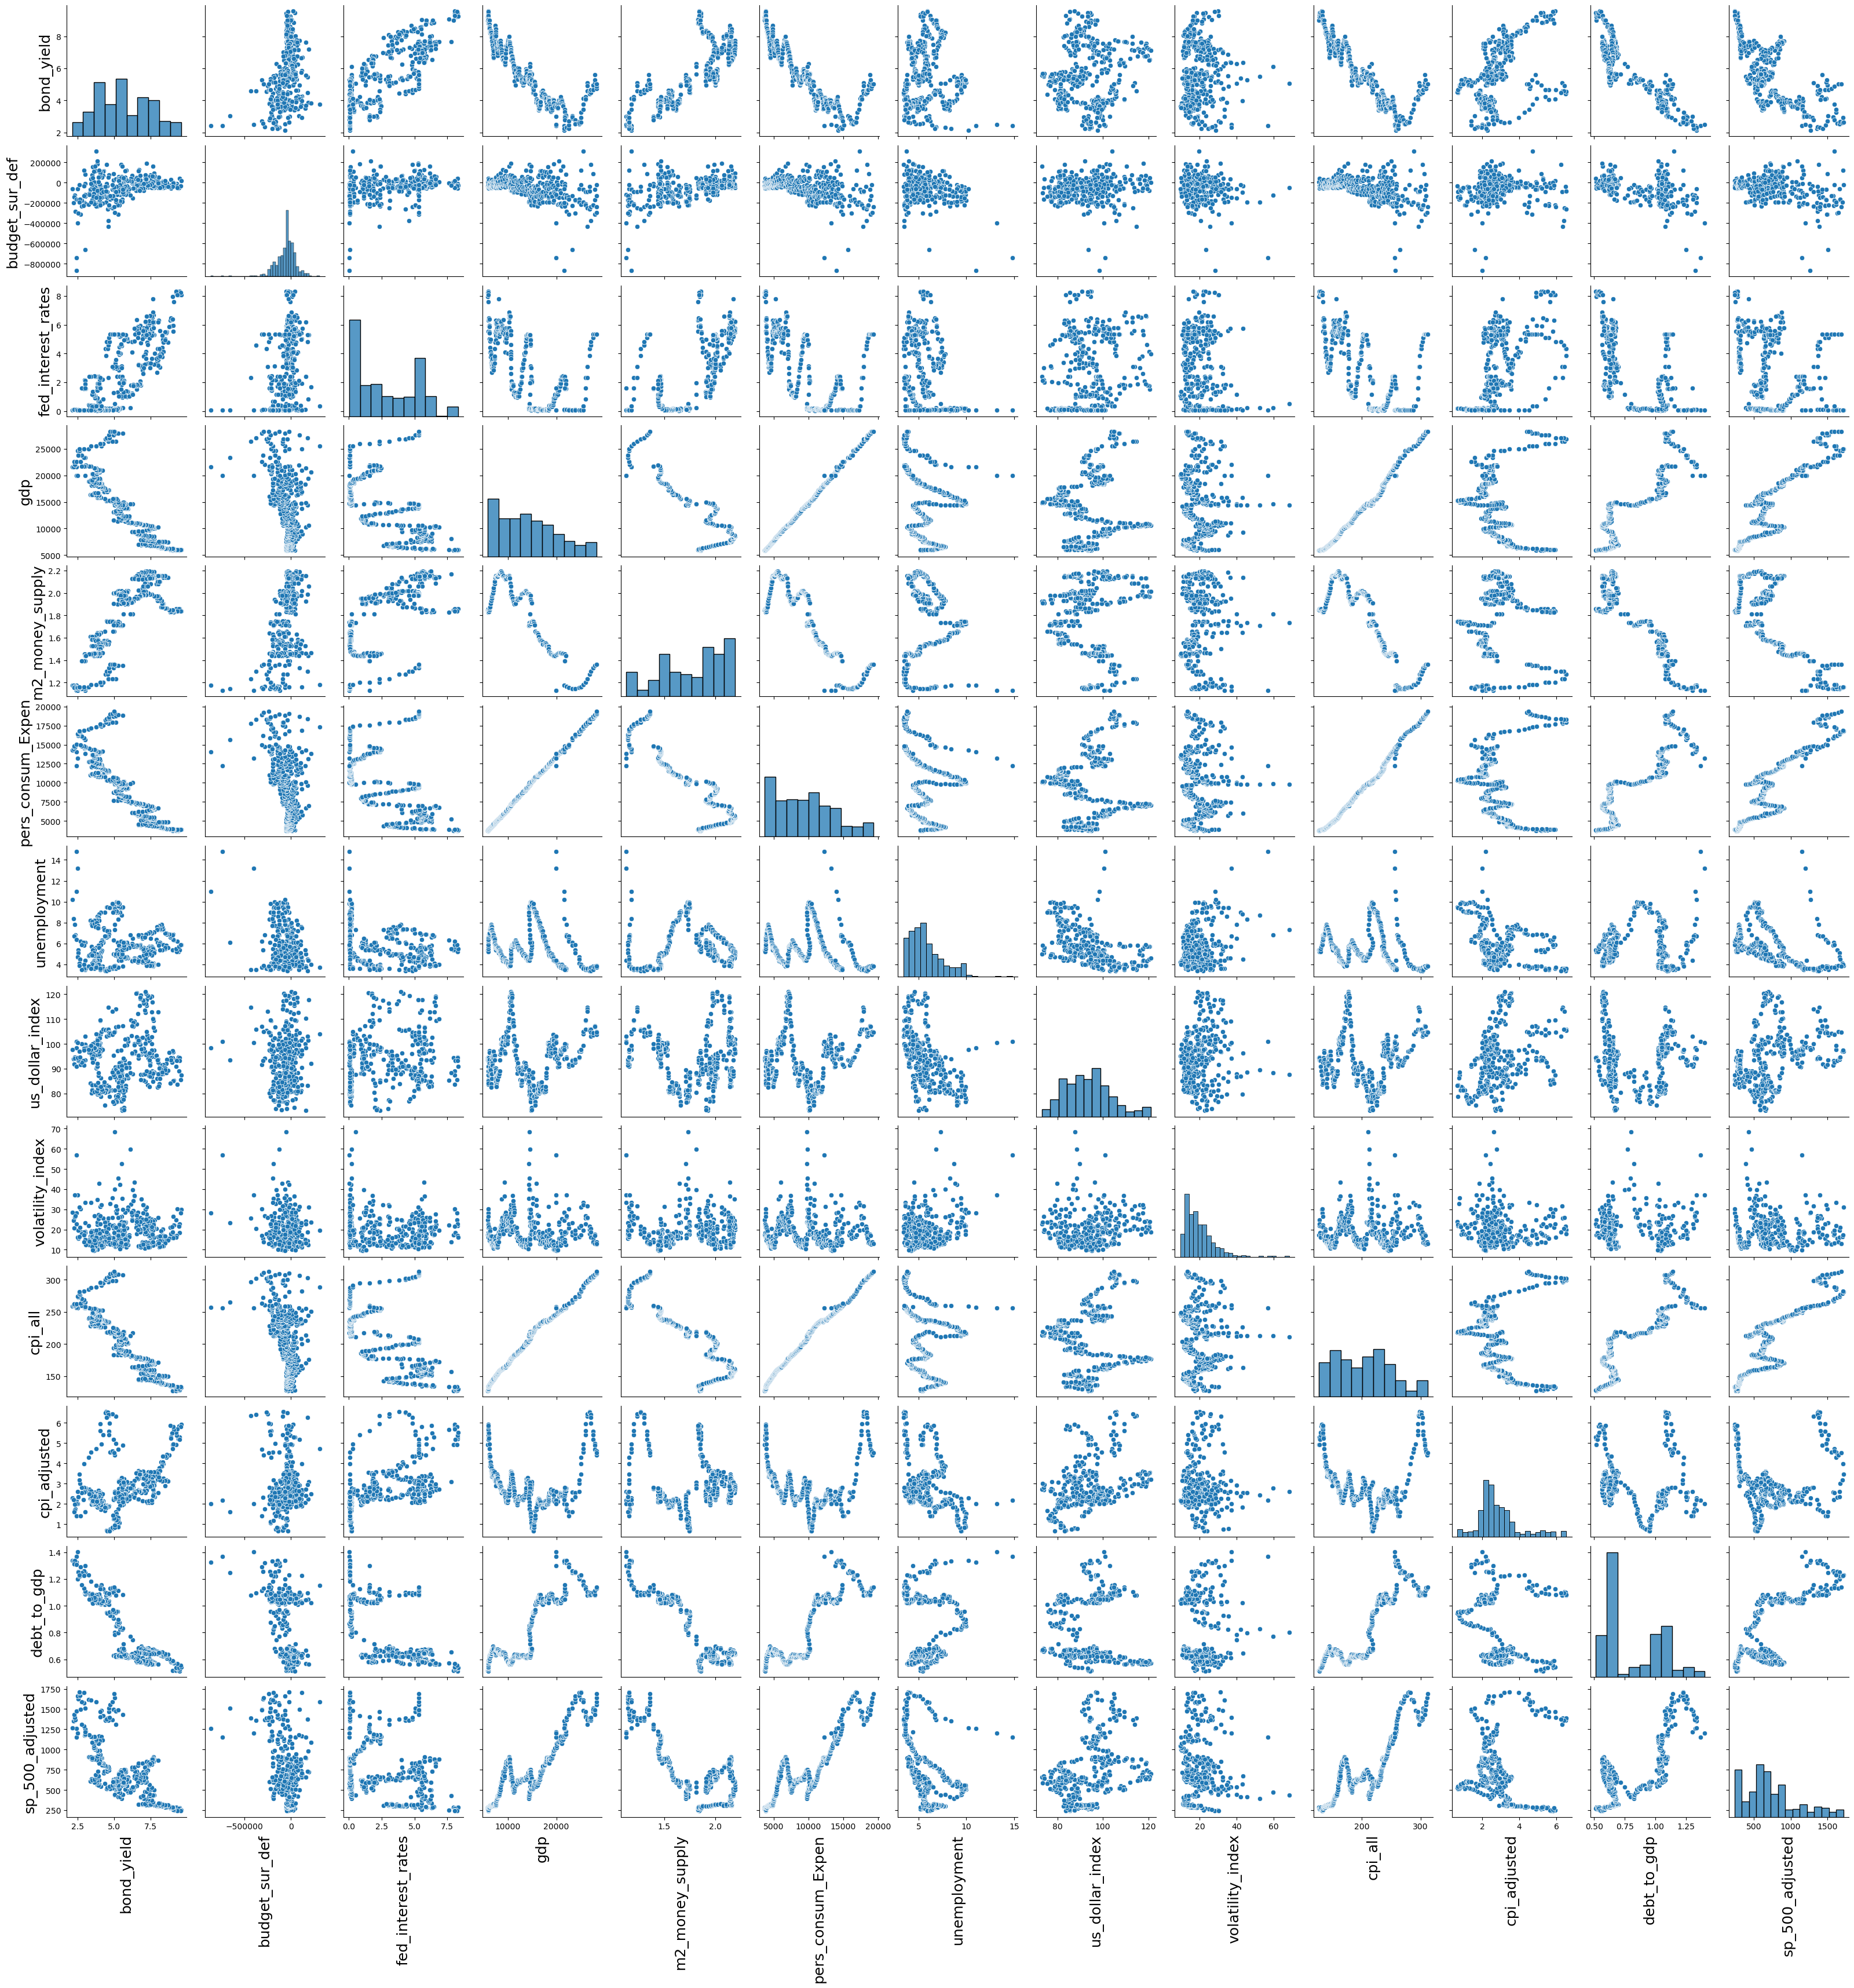

In [11]:
g = sns.pairplot(df)

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90,fontsize=18)
    # rotate and split y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 90,fontsize=18)


It looks like there are a few correlations. Let's create a heatmap with pearson correlation coeffieceint. 

Text(0.5, 1.0, 'Heat map of correlation between features')

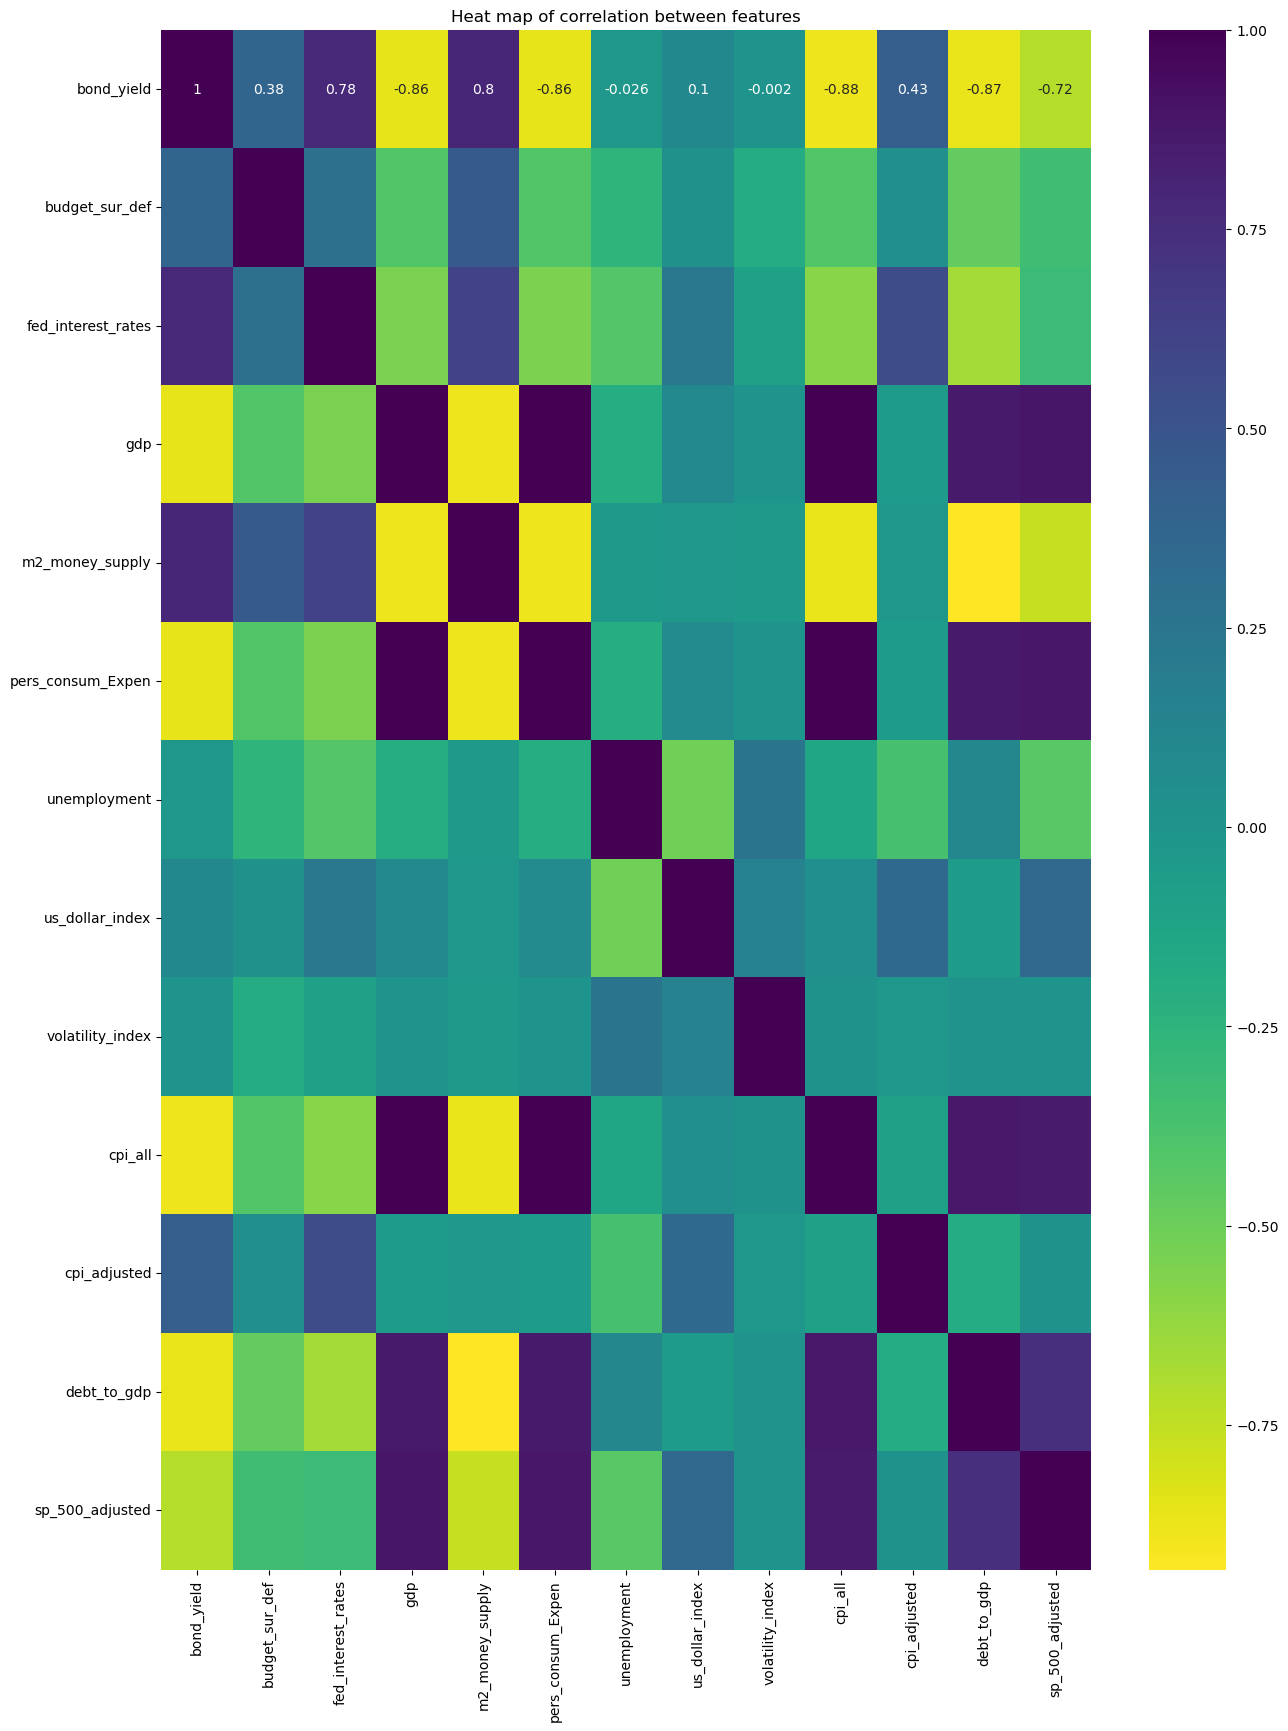

In [12]:
plt.subplots(figsize=(15,20))
sns.heatmap(df.corr(),cmap='viridis_r',annot=True);
plt.title('Heat map of correlation between features')

There are a few notable correlations. GDP, personal consumption expenditure and sp500 are highly correlated with each other and also with other variables such as bond yield, m2 money supply, us debt to gdp ratio and cpi. Since gdp is already considered with us debt to gdp ratio we can drop gdp. Personal consumption expenditure is also highly correlated with cpi and some other features. Therefor considering all these factors I decided to drop some features.

In [13]:
df.drop(['gdp','pers_consum_Expen','sp_500_adjusted'],axis ='columns',inplace=True)

### Principle Component Analysis

In [14]:
# Scale the data

df_copy = df.copy()

df_copy.drop(['fed_interest_rates'],axis ='columns',inplace=True) # seperate the target variable

scaler = StandardScaler()

scaler.fit(df_copy)

df_scale = scaler.transform(df_copy)

#df_scale = scale(df.iloc[:,1:])

In [15]:
pca = PCA().fit(df_scale)

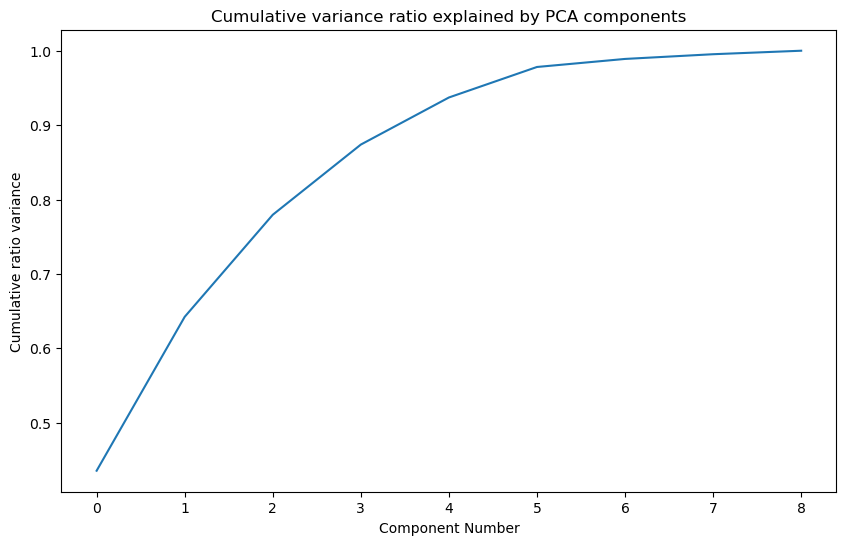

In [16]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component Number')
plt.ylabel('Cumulative ratio variance')
#plt.xticks(np.arange(0,100,1))
plt.title('Cumulative variance ratio explained by PCA components')
plt.show()

In [17]:
# Cumilative sum of explained variance ratio
pca.explained_variance_ratio_.cumsum()

array([0.43543209, 0.64230513, 0.7794918 , 0.87384645, 0.93713738,
       0.97814715, 0.98896343, 0.99529763, 1.        ])

It looks like 3 principle componenets along accounts for 78% of the variance. 

In [18]:
results = pca.transform(df_scale)

Text(0, 0.5, 'Principle component 2')

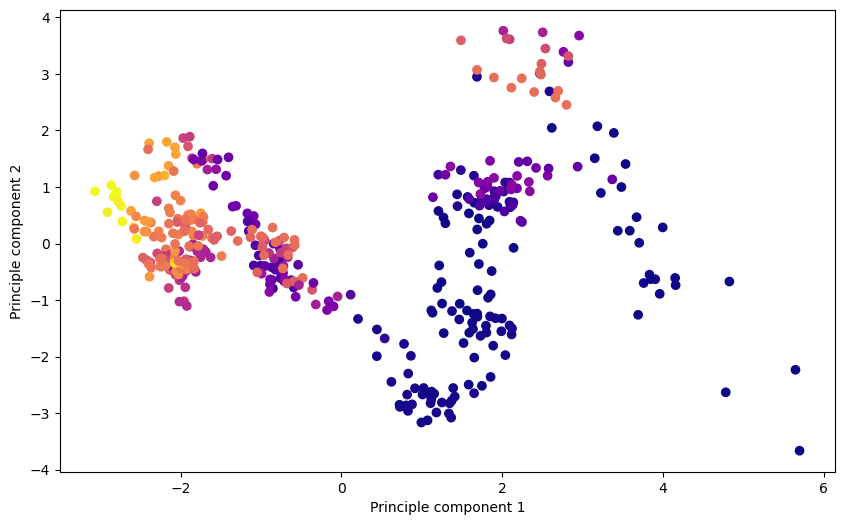

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(results[:,0],results[:,1],c=df['fed_interest_rates'],cmap='plasma')
plt.xlabel("Principle component 1")
plt.ylabel("Principle component 2")

It looks like there is some seperability of data. Let's explore more. Let's plot the principle components interms of the feature importance.

Text(120.72222222222221, 0.5, 'Principle components')

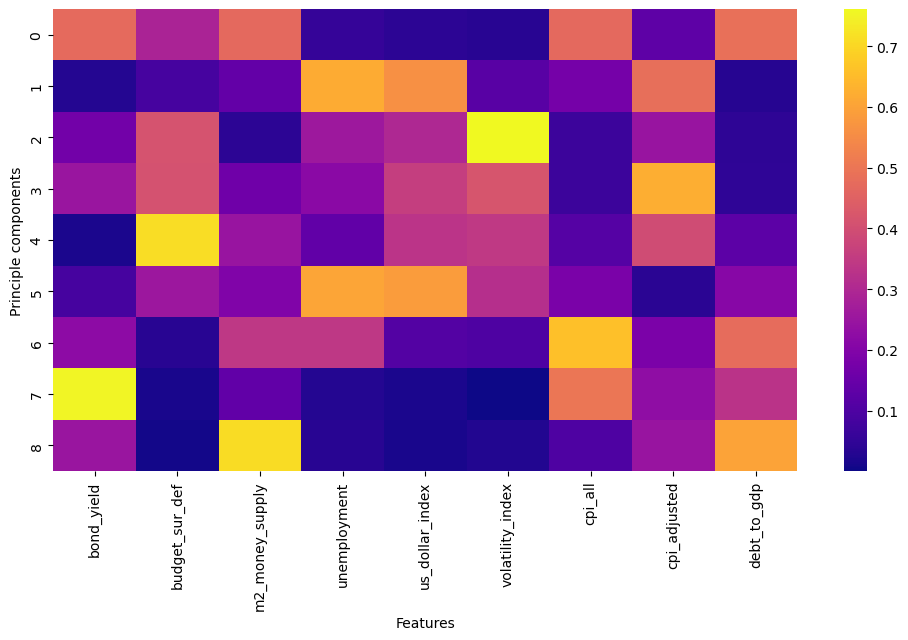

In [20]:
df_pca = pd.DataFrame(abs(pca.components_),columns =df_copy.columns )
plt.figure(figsize=(12,6))
sns.heatmap(df_pca,cmap='plasma')
plt.xlabel("Features")
plt.ylabel('Principle components')

In [21]:
abs(100*pca.components_)

array([[4.70652048e+01, 2.86712769e+01, 4.67848952e+01, 5.65318193e+00,
        4.04552507e+00, 3.34591869e+00, 4.67882069e+01, 1.28580799e+01,
        4.85799498e+01],
       [2.75591063e+00, 8.62086445e+00, 1.39307461e+01, 6.17539978e+01,
        5.59299618e+01, 1.16373175e+01, 1.73477082e+01, 4.83372357e+01,
        3.07320692e+00],
       [1.69071359e+01, 4.10987123e+01, 3.91260597e+00, 2.56290774e+01,
        2.99031345e+01, 7.61325642e+01, 6.82658071e+00, 2.44357631e+01,
        4.33739574e+00],
       [2.48839846e+01, 4.09093301e+01, 1.61613296e+01, 2.14703144e+01,
        3.59340616e+01, 4.18641219e+01, 6.67513526e+00, 6.22460932e+01,
        4.69638297e+00],
       [1.67947300e+00, 7.12781459e+01, 2.45923301e+01, 1.36026350e+01,
        3.32113850e+01, 3.44283778e+01, 1.13104480e+01, 3.93261560e+01,
        1.28065936e+01],
       [8.42907389e+00, 2.53989969e+01, 1.95026007e+01, 6.05203240e+01,
        5.86829101e+01, 3.18403150e+01, 1.81861366e+01, 3.68402358e+00,
        2.0

It looks like the features bond_yield, m2_money_supply, cpi and debt to gdp ratio are the significant features realted to the first principle component. Unemployment, us dollar index and adjusted cpi are the most represented in the second principle component. Volatility index and the budget surplus/deficiet are the highlights from the third principle component.  

Text(0, 0.5, 'Principle component 2')

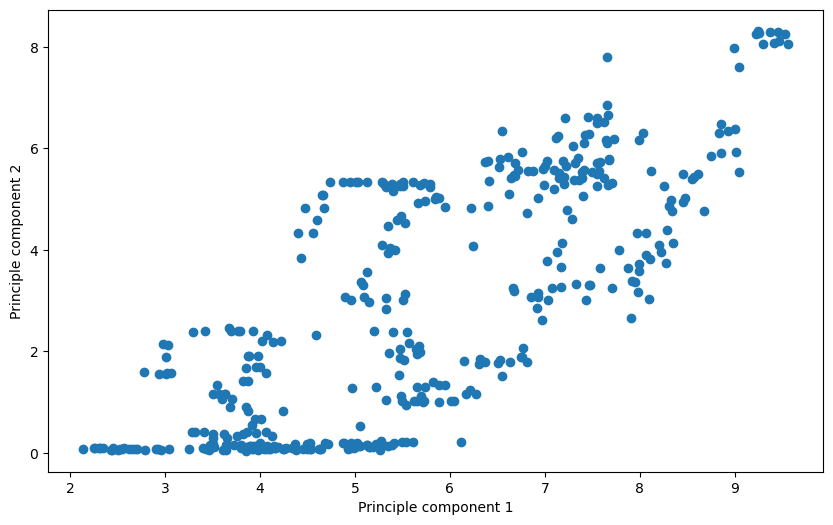

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df.bond_yield,df['fed_interest_rates'])
# plt.xlabel("Principle component 1")
# plt.ylabel("Principle component 2")

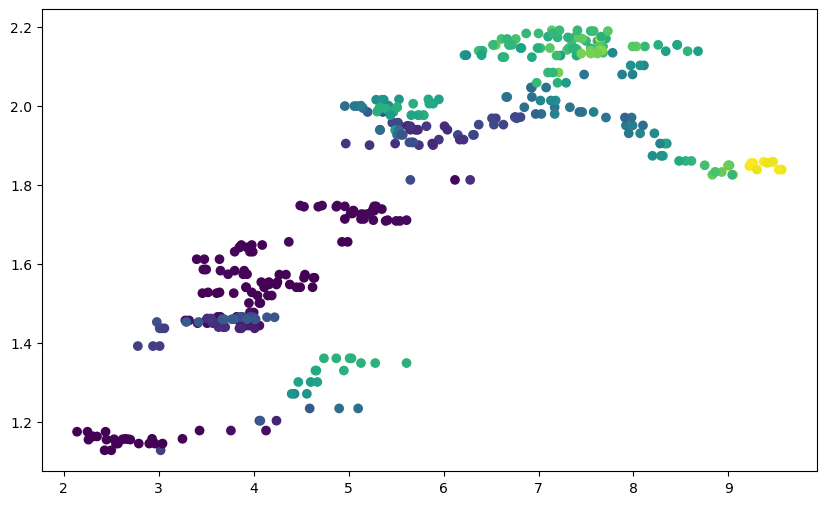

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(df.bond_yield,df.m2_money_supply,c=df['fed_interest_rates'])

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.bond_yield,df.m2_money_supply,c=df['fed_interest_rates'])

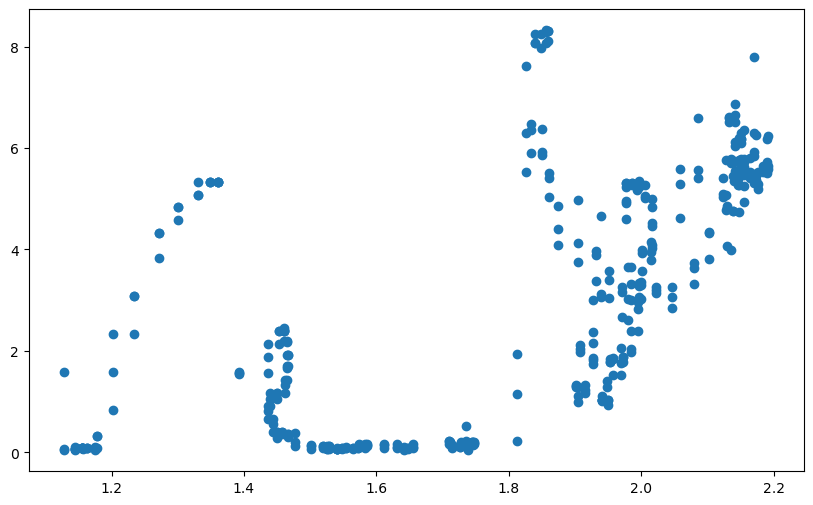

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df.m2_money_supply,df['fed_interest_rates'])

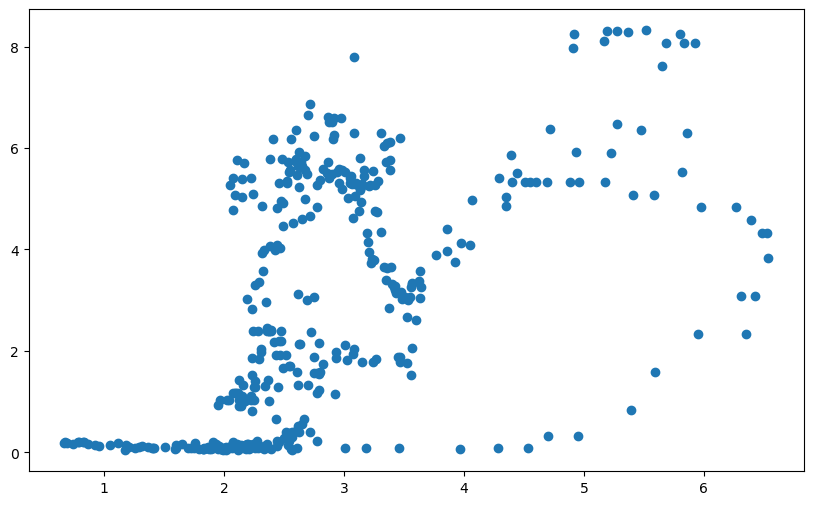

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(df.cpi_adjusted,df['fed_interest_rates'])

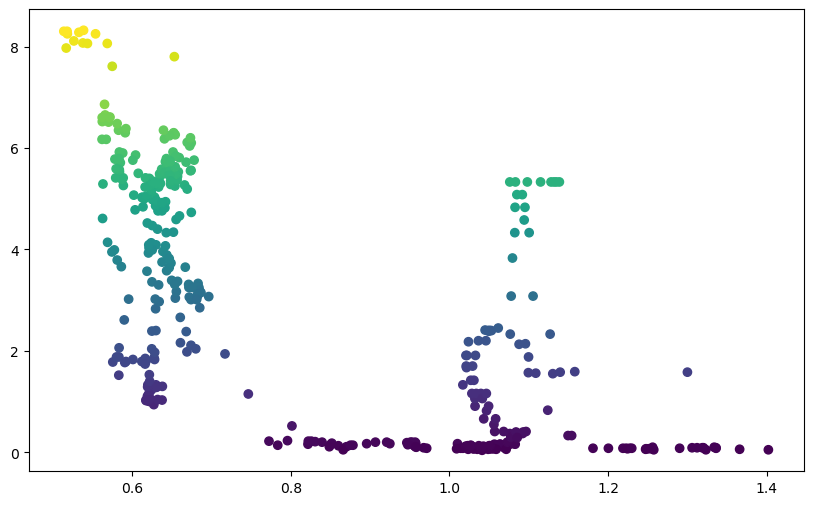

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(df.debt_to_gdp,df['fed_interest_rates'],c=df['fed_interest_rates'])

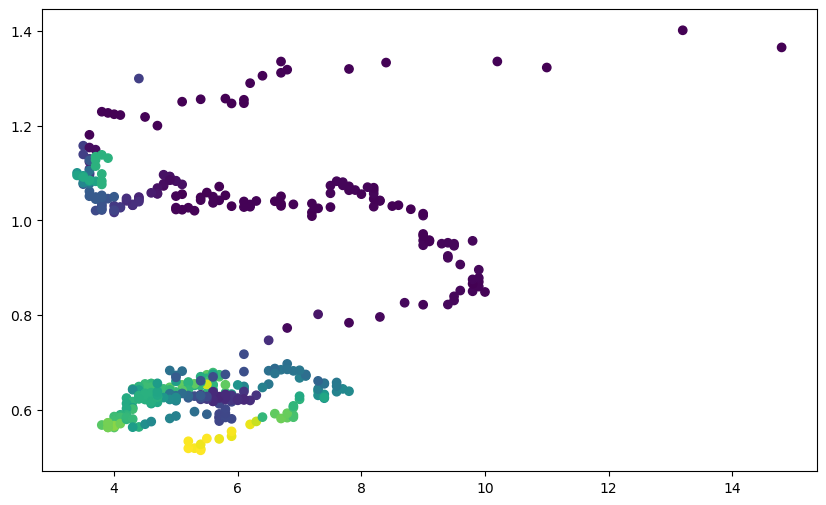

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df.unemployment,df.debt_to_gdp,c=df['fed_interest_rates'])

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_scale)
tsne.kl_divergence_

0.20877528190612793

In [32]:
import plotly.express as px
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=df['fed_interest_rates'])
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()